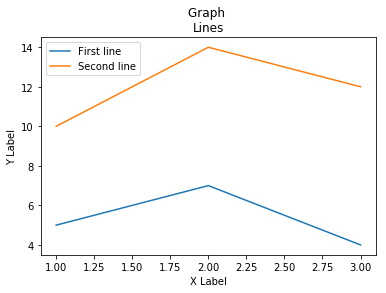

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import urllib
import numpy as np

#Line plot

x = [1,2,3]
y = [5,7,4]

x2 = [1,2,3]
y2 = [10,14,12]

plt.plot(x,y , label= 'First line')
plt.plot(x2,y2, label= 'Second line')

plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Graph \nLines')
plt.legend()

plt.show()

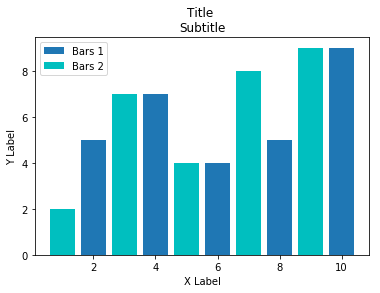

In [15]:
#Bar plot
x = [2,4,6,8,10]
y = [5,7,4,5,9]

x2 = [1,3,5,7,9]
y2 = [2,7,4,8,9]

plt.bar(x,y , label= 'Bars 1')
plt.bar(x2,y2 , label= 'Bars 2' , color = 'c')

plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Bar Plot \nSubtitle')
plt.legend()

plt.show()

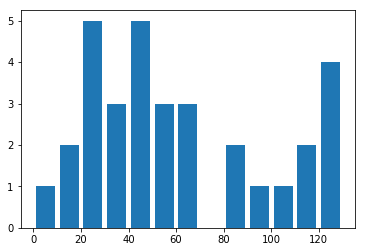

In [19]:
#histogram

population_ages = [22,55,62,45,21,22,34,42,
                   42,4,99,102,110,120,125,
                   123,130,11,22,33,44,115,
                   80,56,87,23,54,67,69,12,48,34]

#ids = [x for x in range(len(population_ages))]
#plt.bar(ids, population_ages , label = 'Population ages')

#Binning
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

plt.hist(population_ages, bins, histtype = 'bar', rwidth=0.8)

plt.show()

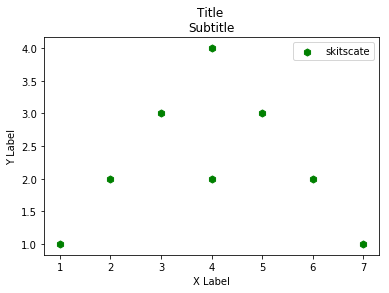

In [22]:
#scatter plot

x = [1,2,3,4,5,6,7,4]
y = [1,2,3,4,3,2,1,2]

plt.scatter(x,y, label='skitscate', color ='g', marker='h', s= 50) 

plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Scatter plot \nSubtitle')
plt.legend()

plt.show()

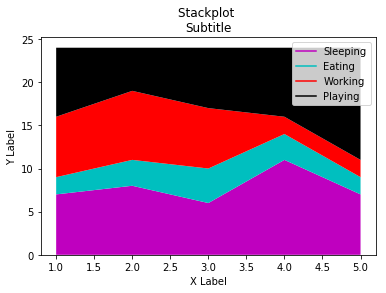

In [25]:
#stack plot

days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]

#workaround labeling on stackplot
plt.plot([],[], c= 'm', label ='Sleeping')
plt.plot([],[], c= 'c', label ='Eating')
plt.plot([],[], c= 'r', label ='Working')
plt.plot([],[], c= 'k', label ='Playing')

plt.stackplot(days, sleeping, eating,working, playing, colors = [ 'm','c','r','k'])

plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Stackplot \nSubtitle')
plt.legend()

plt.show()

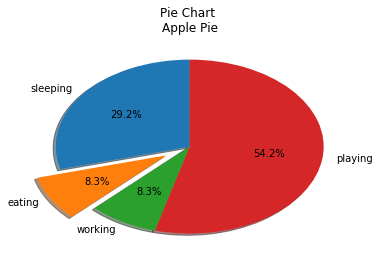

In [46]:
#pie chart

slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
#cols = ['c','m','r','k'] | colors = cols

plt.pie(slices,
        labels=activities,
        startangle=90,
        shadow=True, 
        explode = (0,0.2,0,0),
        autopct = '%1.1f%%'
       )

plt.title('Pie Chart \nApple Pie')
#you dont need legend its pretty obvious
#plt.legend()
plt.show()

In [174]:
import urllib
import datetime as dt
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

'''
UNIXTIMESTAMP

dateconv = np.vectorized(dt.datetime.fromtimestamps())
yourdate = dateconv(yourdate)
'''

def graph_data(stock):
    
    #plotting
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1) , (0,0))
    

    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    #chart yahoo is down so I will use the replacement
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
                
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')}
                                                                     )
    
    ax1.plot_date(date, closep, '-', label = 'Price')    
    ax1.plot([],[], linewidth =3, label='profit', c='g', alpha = 0.5)
    ax1.plot([],[], linewidth =3, label='loss', c='r', alpha = 0.5)
    
    ax1.axhline(closep[0], color= '#2f3640', linewidth=1)
    #profit plot
    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.3)
    #loss plot
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.3)
    
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    ax1.grid(True, color='g', linestyle = '--')
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('red')
#     ax1.set_yticks([0,25,50,75])

    ax1.spines['left'].set_color('c')
    ax1.spines['bottom'].set_color('c')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    
    ax1.tick_params(axis='x',colors='#f39c12')
    
    plt.xlabel('Dates')
    plt.ylabel('Price (Close)')
    plt.title('Yahoo Finance \nOHLC')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.18, right = 0.94, top=0.95, wspace =0.2, hspace=0)
    
    plt.show()

    

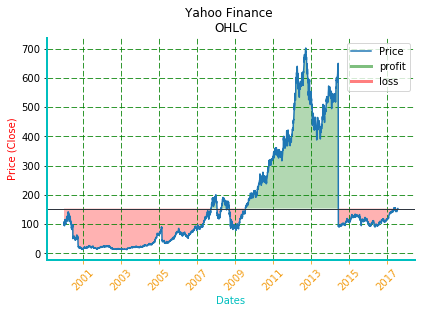

In [175]:
graph_data('test')